In [1]:
import numpy as np
import matplotlib.pyplot as plt
import uproot
import awkward as ak

In [49]:
file_fast = uproot.open("/data/xenon/acolijn/G4FastSim/fast/fast_large_fiducial.root")
file_std = uproot.open("/data/xenon/acolijn/G4FastSim/standard/standard_100k.root")

fast = file_fast["ev"].arrays()
std = file_std["ev"].arrays()


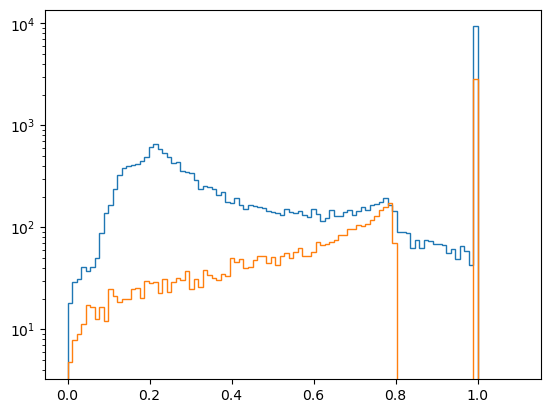

In [56]:
cut = (std['nc']==1) 

h = plt.hist(std['eh'][cut], bins=100, histtype='step', range=(0,1.1), label='standard')

cut = (fast['nc']==1)
h = plt.hist(fast['e'][cut], weights=np.exp(fast['w'][cut]), bins=100, histtype='step', range=(0,1.1), label='standard')
plt.xscale('linear')
plt.yscale('log')

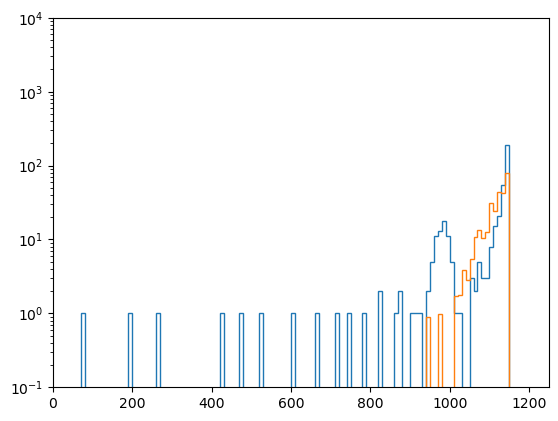

In [62]:
cut = (std['nc']==1) #& (std['e']>0.00001)

xh =ak.to_numpy(ak.flatten(std['xh'][cut]))
yh =ak.to_numpy(ak.flatten(std['yh'][cut]))
zh =ak.to_numpy(ak.flatten(std['zh'][cut]))

fid = (np.sqrt(xh**2+yh**2)<1150) & (np.abs(zh)<1000)
h= plt.hist(np.sqrt(xh[fid]**2+yh[fid]**2), bins=200, histtype='step', range=(0,2000), label='standard')

cutf = (fast['nc']==1) 
xf =ak.to_numpy(ak.flatten(fast['xh'][cutf]))
yf =ak.to_numpy(ak.flatten(fast['yh'][cutf]))
zf =ak.to_numpy(ak.flatten(fast['zh'][cutf]))
wf =ak.to_numpy(ak.flatten(fast['wh'][cutf]))

fid = (np.sqrt(xf**2+yf**2)<1150) & (np.abs(zf)<1000)
h= plt.hist(np.sqrt(xf[fid]**2+yf[fid]**2), weights=np.exp(wf[fid]), bins=200, histtype='step', range=(0,2000),label='standard')
#h= plt.hist(np.sqrt(xf[fid]**2+yf[fid]**2), bins=200, histtype='step', range=(0,2000),label='standard')


plt.yscale('log')

#plt.xlim(1100,1200)
plt.ylim(0.1,1e4)
plt.xlim(0,1250)
plt.show()

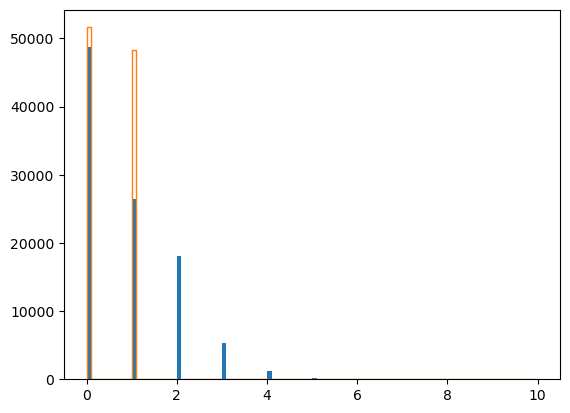

In [63]:
h= plt.hist(std['nc'],bins=100, range=(0,10))
h= plt.hist(fast['nc'],bins=100, range=(0,10), histtype='step')	

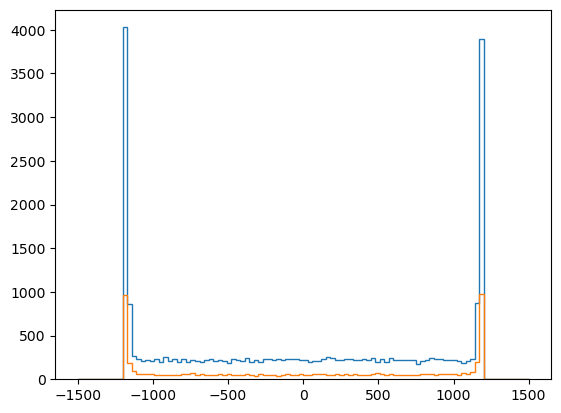

In [53]:
cut = (std['nc']==1)
zh =ak.to_numpy(ak.flatten(std['zh'][cut]))
h= plt.hist(zh, bins=100, histtype='step', range=(-1500,1500),label='standard')

cutf = (fast['nc']==1) #& (std['e']>0.00001
zhf =ak.to_numpy(ak.flatten(fast['zh'][cutf]))
wf =ak.to_numpy(ak.flatten(fast['wh'][cutf]))

h= plt.hist(zhf, weights=np.exp(wf), bins=100, histtype='step', range=(-1500,1500),label='fast')
plt.show()